This notebook follows a guide from the book "Deep Learning with Python" by Francois Chollet on features visualization with CNN's using images.
A similar process will be followed with and audio specific model.

In [1]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import load_model, Model
from tensorflow.keras.backend import gradients, mean
from keras.engine.keras_tensor import KerasTensor
from typing import List
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np
import matplotlib.pyplot as plt


IMAGE_PATH = '../media/images/chomsky_sitting.png'
NUM_LAYERS: int = 8  # Number of layers to extract features from.

## Visualizing hidden layer a.

##### Load image

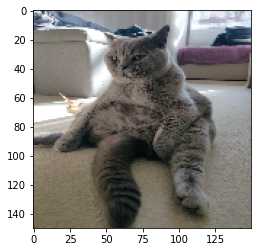

In [8]:
img: np.ndarray = img_to_array(load_img(IMAGE_PATH, target_size=(150, 150)))
img = np.expand_dims(img, axis=0) / 255

plt.imshow(img[0])
plt.show()

##### Load VGG model for feature extraction.

In [9]:
model: Model = VGG16(weights='imagenet', include_top=False)

layer_output: List[KerasTensor] = [layer.output for layer in model.layers[:NUM_LAYERS]]
activation_model = Model(inputs=model.input, outputs=layer_output)

model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, None, None, 3)]   0         
                                                                 
 block1_conv1 (Conv2D)       (None, None, None, 64)    1792      
                                                                 
 block1_conv2 (Conv2D)       (None, None, None, 64)    36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, None, None, 64)    0         
                                                                 
 block2_conv1 (Conv2D)       (None, None, None, 128)   73856     
                                                                 
 block2_conv2 (Conv2D)       (None, None, None, 128)   147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, None, None, 128)   0     

Run image through model, and collect all neuron activations into a list.

(1, 150, 150, 64)


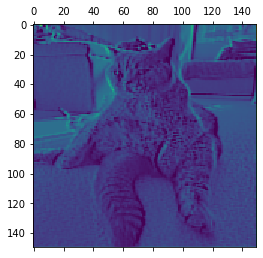

In [5]:
activations: List[np.ndarray] = activation_model.predict(img)
first_layer_activation: np.ndarray = activations[1]  # First convulsion layer in VGG model.

print(first_layer_activation.shape)

# Visualize 3rd neuron from the first Conv layer.
plt.matshow(first_layer_activation[0, :, :, 2], cmap='viridis')
plt.show()

Visualize first 16 neurons from the first 8 layers of the VGG model.

/Users/andreaspiteri/uni/auditory-deepdream/venv/lib/python3.7/site-packages/ipykernel_launcher.py:32: UserWarning: Attempting to set identical bottom == top == -0.5 results in singular transformations; automatically expanding.
/Users/andreaspiteri/uni/auditory-deepdream/venv/lib/python3.7/site-packages/matplotlib/tight_bbox.py:71: RuntimeWarning: divide by zero encountered in double_scalars
  fig.patch.set_bounds(x0 / w1, y0 / h1,
/Users/andreaspiteri/uni/auditory-deepdream/venv/lib/python3.7/site-packages/matplotlib/tight_bbox.py:72: RuntimeWarning: divide by zero encountered in double_scalars
  fig.bbox.width / w1, fig.bbox.height / h1)
/Users/andreaspiteri/uni/auditory-deepdream/venv/lib/python3.7/site-packages/matplotlib/patches.py:744: RuntimeWarning: invalid value encountered in double_scalars
  y1 = self.convert_yunits(self._y0 + self._height)
/Users/andreaspiteri/uni/auditory-deepdream/venv/lib/python3.7/site-packages/matplotlib/transforms.py:2053: RuntimeWarning: invalid valu

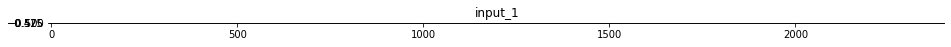

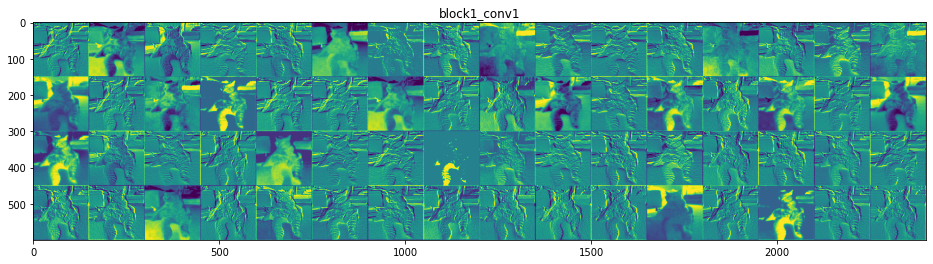

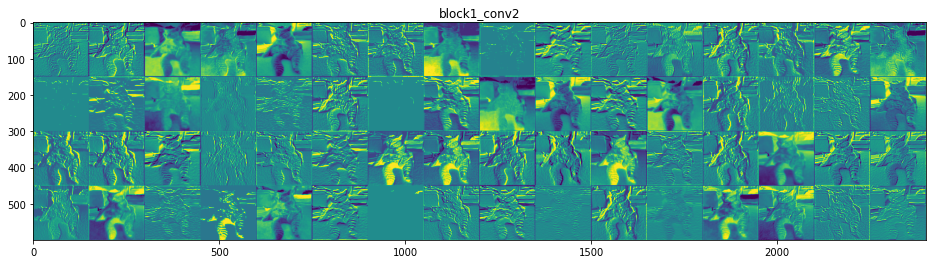

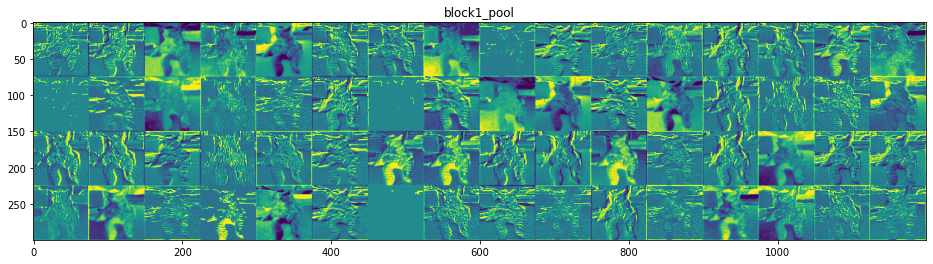

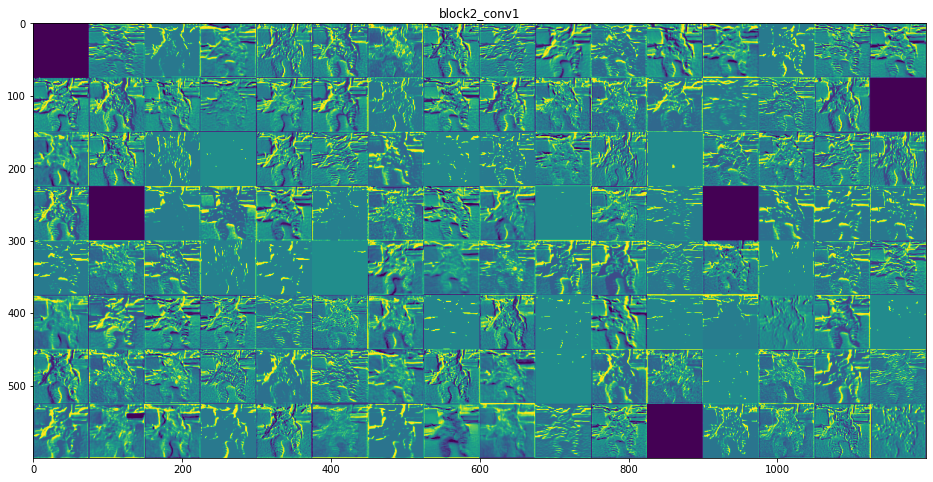

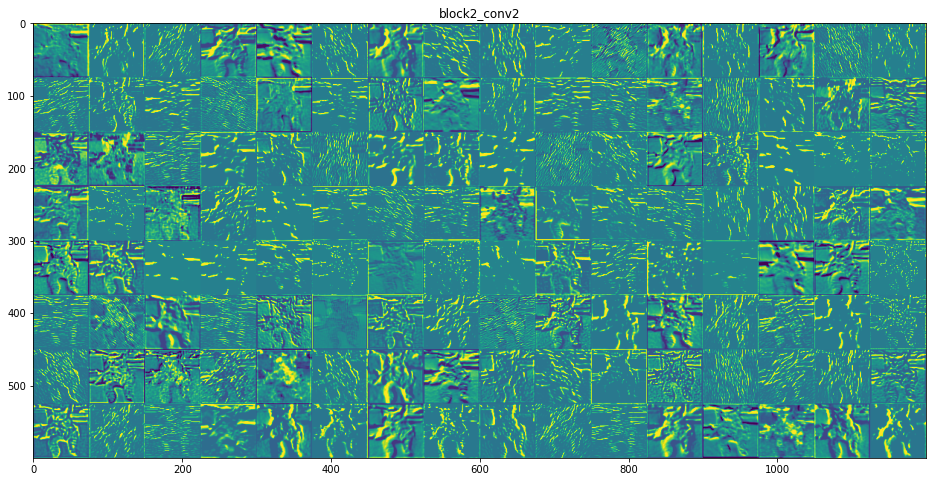

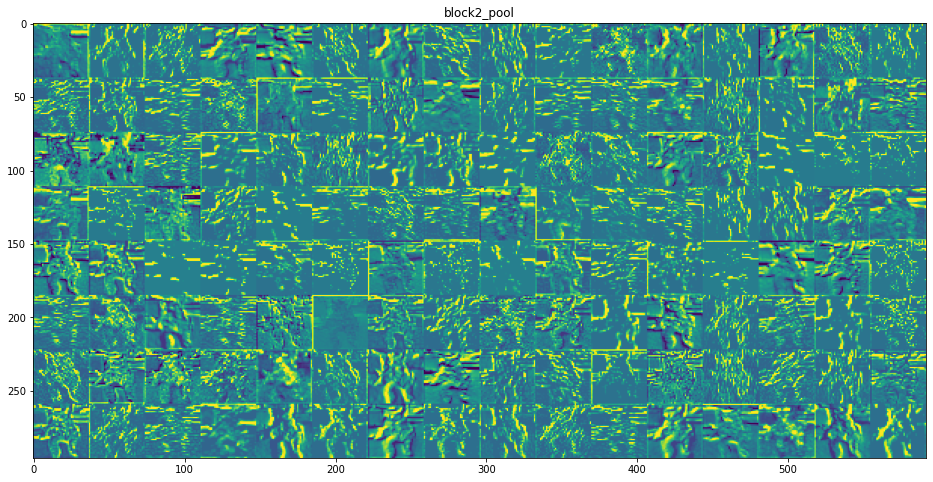

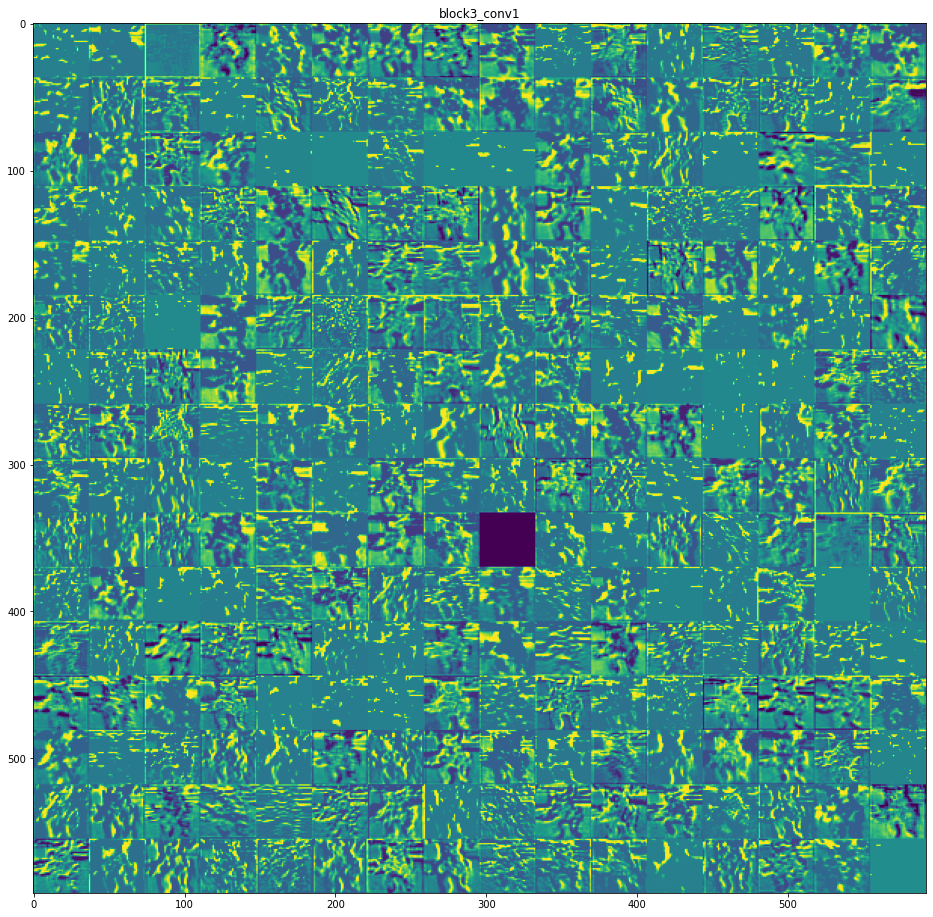

In [7]:
layer_names: List[str] = []

for layer in model.layers[:NUM_LAYERS]:
    layer_names.append(layer.name)

images_per_row: int = 16

for layer_name, layer_activation in zip(layer_names, activations):
    n_features: int = layer_activation.shape[-1]
    size: int = layer_activation.shape[1]
    n_cols: int = n_features // images_per_row
    display_grid = np.zeros((size * n_cols, images_per_row * size))

    for col in range(n_cols):
        for row in range(images_per_row):
            channel_image = layer_activation[0, :, :, col * images_per_row + row]
            channel_image -= channel_image.mean()
            channel_image /= channel_image.std()
            channel_image *= 64
            channel_image += 128
            channel_image = np.clip(channel_image, 0, 255).astype('uint8')

            display_grid[
            col * size: (col + 1) * size,
            row * size: (row + 1) * size
            ] = channel_image

    scale: float = 1.0 / size
    plt.figure(figsize=(scale * display_grid.shape[1], scale * display_grid.shape[0]))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto')
